In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
ir_data=pd.read_excel('iris.xls')


# basic info

In [14]:
ir_data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
ir_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
ir_data.info

<bound method DataFrame.info of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [8]:
ir_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [15]:
ir_data.shape

(150, 5)

In [17]:
ir_data['SW'].value_counts(normalize=True)

3.0    0.180556
2.8    0.097222
3.2    0.090278
3.1    0.083333
3.4    0.083333
2.9    0.069444
2.7    0.062500
3.8    0.041667
2.5    0.041667
2.6    0.034722
3.3    0.034722
2.3    0.027778
3.5    0.027778
2.2    0.020833
2.4    0.020833
3.6    0.020833
3.9    0.013889
3.7    0.013889
4.4    0.006944
2.0    0.006944
4.0    0.006944
4.2    0.006944
4.1    0.006944
Name: SW, dtype: float64

In [18]:
ir_data['Classification'].value_counts(normalize=True)

Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

# Null value arrangments

In [19]:
for item in ['SL','SW','PL']:
    ir_data.fillna(ir_data[item].median(),inplace=True)

In [20]:
ir_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

# outlier checking

<AxesSubplot:ylabel='SL'>

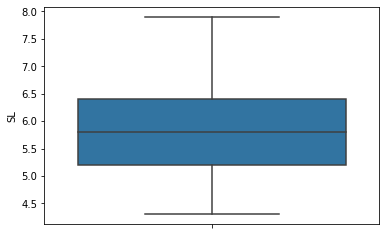

In [21]:
sns.boxplot(y='SL',data=ir_data)

<AxesSubplot:ylabel='SW'>

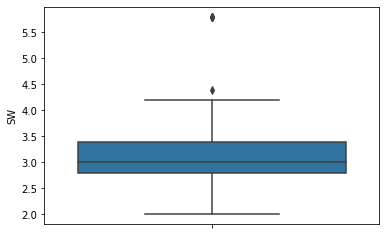

In [22]:
sns.boxplot(y='SW',data=ir_data)

# removing the outlier using IQR

In [23]:

q1 = np.percentile(ir_data['SW'],25,interpolation='midpoint')
q2 = np.percentile(ir_data['SW'],50,interpolation='midpoint')
q3 = np.percentile(ir_data['SW'],75,interpolation='midpoint')

In [24]:
#Calculation
IQR = q3-q1

In [25]:
upp_lim = q3 + 1.5*IQR
low_lim = q1 - 1.5*IQR

In [27]:
filtr = (ir_data['SW']> upp_lim) & (ir_data['SW']> low_lim)

In [29]:
ir_data.drop([10, 15, 27, 43, 72, 98, 124],inplace=True)

<AxesSubplot:ylabel='SW'>

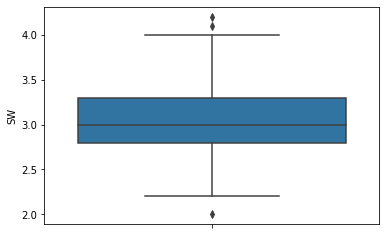

In [30]:
sns.boxplot(y='SW',data=ir_data)

<AxesSubplot:ylabel='PL'>

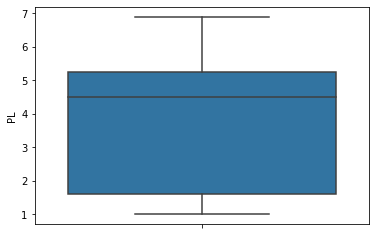

In [31]:
sns.boxplot(y='PL',data=ir_data)

<AxesSubplot:ylabel='PW'>

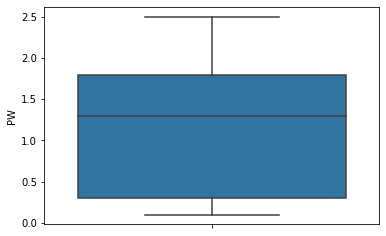

In [32]:
sns.boxplot(y='PW',data=ir_data)

# converting the classifications to numeric values

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ir_data.Classification =le.fit_transform(ir_data.Classification)

In [36]:
ir_data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# splitting the data - features and target

In [37]:
x = ir_data.drop(columns=['Classification'])


In [38]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.8,2.0
148,6.2,3.4,5.4,2.3


In [39]:
y = ir_data['Classification']

In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 143, dtype: int32

# Data scaling

In [42]:
x.describe()

,SL,SW,PL,PW
count,143.000000,143.00000,143.000000,143.000000
mean,5.864336,3.03986,3.888112,1.214685
std,0.815899,0.41692,1.761501,0.763789
min,4.300000,2.00000,1.000000,0.100000
25%,5.200000,2.80000,1.600000,0.300000
50%,5.800000,3.00000,4.500000,1.300000
75%,6.400000,3.30000,5.250000,1.800000
max,7.900000,4.20000,6.900000,2.500000


In [43]:
from sklearn import preprocessing
standardization = preprocessing.StandardScaler()

In [44]:
x = standardization.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02
mean,1.182669e-15,-1.272292e-15,9.006005e-17,1.832256e-16
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00
min,-1.924055e+00,-2.502913e+00,-1.645337e+00,-1.464544e+00
25%,-8.170998e-01,-5.773364e-01,-1.303522e+00,-1.201771e+00
50%,-7.912966e-02,-9.594219e-02,3.485884e-01,1.120918e-01
75%,6.588405e-01,6.261491e-01,7.758582e-01,7.690235e-01
max,2.503766e+00,2.792423e+00,1.715852e+00,1.688728e+00


# splitting the data - train and testset

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [47]:

x_test.shape

(29, 4)

In [48]:
x_train.shape

(114, 4)

# model buildings

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred = logreg.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,log_loss
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred,average='micro'))
print("RECALL: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

ACCURACY:  0.9310344827586207
PRECISION:  0.9310344827586207
RECALL:  0.9310344827586207
F1_score 0.9310344827586207


# K-N-N

In [52]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)

for k in neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train,y_train)
    y_pred = knn_classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

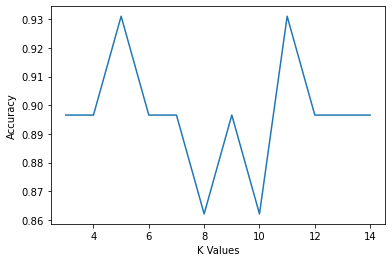

In [53]:
plt.plot(neighbors, acc_values)
plt.xlabel('K Values')
plt.ylabel('Accuracy')

assume the value is 5

In [54]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train,y_train)
y_pred = knn_classifier.predict(x_test)

In [55]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred,average='micro'))
print("RECALL: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

ACCURACY:  0.9310344827586207
PRECISION:  0.9310344827586207
RECALL:  0.9310344827586207
F1_score 0.9310344827586207


# Support Vector Machine

In [56]:
from sklearn.svm import SVC
acc_values = []
for item in ['linear','poly','rbf']:
    svm_classifier = SVC(kernel=item)
    svm_classifier.fit(x_train,y_train)
    y_pred = svm_classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [57]:
acc_values

[0.9655172413793104, 0.7931034482758621, 0.9655172413793104]

we can choose  linear or rbf kernel SVM since they are better than poly

In [58]:
    svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(x_train,y_train)
y_pred = svm_classifier.predict(x_test) 

In [59]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred,average='micro'))
print("RECALL: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

ACCURACY:  0.9655172413793104
PRECISION:  0.9655172413793104
RECALL:  0.9655172413793104
F1_score 0.9655172413793104


# decison tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train,y_train)
y_pred = dt_classifier.predict(x_test)

In [61]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred,average='micro'))
print("RECALL: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

ACCURACY:  0.8620689655172413
PRECISION:  0.8620689655172413
RECALL:  0.8620689655172413
F1_score 0.8620689655172413


# random forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train,y_train)
y_pred = rf_classifier.predict(x_test)

In [63]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred,average='micro'))
print("RECALL: ",recall_score(y_test,y_pred,average='micro'))
print("F1_score",f1_score(y_test,y_pred,average='micro'))

ACCURACY:  0.8620689655172413
PRECISION:  0.8620689655172413
RECALL:  0.8620689655172413
F1_score 0.8620689655172413


# feature importance

In [65]:
x.head(10)

,0,1,2,3
0,-0.940095,1.107543,-1.417460,-1.333158
1,-1.186085,-0.095942,-1.417460,-1.333158
2,-0.079130,0.385452,-1.474429,-1.333158
3,-1.555070,0.144755,-1.360491,-1.333158
4,-1.063090,1.348240,-1.417460,-1.333158
5,-0.571110,2.070332,-1.246552,-1.070385
6,-1.555070,0.866846,-1.417460,-1.201771
7,-1.063090,0.866846,-1.360491,-1.333158
8,-1.801060,-0.336639,-1.417460,-1.333158
9,-1.186085,0.144755,-1.360491,-1.464544


In [66]:
pd.Series(rf_classifier.feature_importances_, index=x.columns).sort_values(ascending=False)*100

3    56.444036
2    32.065548
0     9.622472
1     1.867944
dtype: float64

# RESULT

SVM GIVES THE BEST RESULT

# SUMMARY

 The models tested on this dataset SVM has highest scores in accuracy,f1_score,recall and precision